# Taxonomy and evaluation of Computer Vision Tasks

## Miroslav Jiřík


# Tasks in Computer Vision


# Goal
  * Make a list of all important computer vision tasks
  * Learn how to evaluate the experiment

# Prerequisities

* Basic knowledge of Python - [Online course](http://pythonic.eu/fjfi/)
* Installed Python with computer vision packages [Anaconda distribution](https://www.anaconda.com/) or [Google Colab](https://colab.research.google.com/)

* This presentation sources: https://github.com/mjirik/usvp


![classification_dog.png](classification_dog.png)



What is the presented task?

* Classification
* Segmentation
* Tracking

# Image Classification


Image Classification (often referred to as Image Recognition) is the task of associating one (single-label classification) or more (multi-label classification) labels to a given image.  


(definition by [Hmrishav Bandyopadhyay](https://www.v7labs.com/blog/image-classification-guide))





* Single-label Classification
    * Binar
    * General
* Multi-label Classification

Při klasifikaci je cílem zařadit obraz do jedné nebo více kategorií - tříd. Třídou může být například auto, zvíře, strom.

## Binar classification

Email **✉**

* Spam
* Not Spam


## Single-label Classification

Sometimes called also Multi-class Single-label Classification

![single-label-classification](single_label_classification_krizhevski2012.png)

Single-label Image Segmentation [Krizhevski2012](https://dl.acm.org/doi/10.5555/2999134.2999257)

## Multi-label Classification

![classification_dog_cat.png](classification_dog_cat.png)

[Madjarov2012](https://doi.org/10.1016/j.patcog.2012.03.004)

![Human action recognition](https://miro.medium.com/max/1280/1*0WzM-xyA6RudgWquXJdiqw.png)

See "Revisiting 3D ResNet for Video Recognition"

## Classification - Important algorithms - AlexNet

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. ["Imagenet classification with deep convolutional neural networks."](https://proceedings.neurips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)  Advances in neural information processing systems 25 (2012).([PDF](https://dl.acm.org/doi/pdf/10.1145/3065386))



![alexnet_krizhevski2012](alexnet_krizhevski2012.png)

## AlexNet
![krizhevski2012](krizhevski2012.png)

## Classification - Example

![VASC](classification_binar_filipescu2021.png)


[Image Source: Filipescu2021](https://onlinelibrary.wiley.com/doi/full/10.1111/srt.13045)

Vascular lesion—VASC - benign - nezhoubné

How to evaluate the quality of predictor? Try it in python...

In [2]:
import skimage
import skimage.io
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

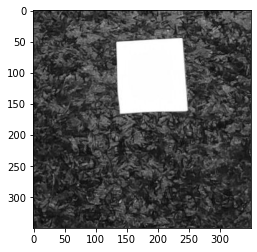

In [10]:
i = 7
url = f"https://github.com/mjirik/ZDO/raw/master/objekty/binar_classification/{i:02d}.jpg"
im = skimage.io.imread(url, as_gray=True)
plt.imshow(im, cmap="gray")

# here is place for your code
# my_prediction = ...

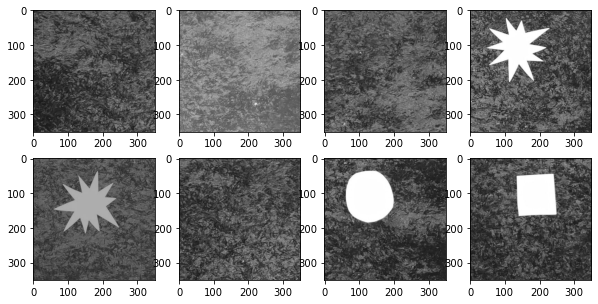

In [11]:
fig, axs = plt.subplots(2,4, figsize=(10, 5))

y_pred = []
for i in range(8):
    url = f"https://github.com/mjirik/ZDO/raw/master/objekty/binar_classification/{i:02d}.jpg"
    im = skimage.io.imread(url, as_gray=True)
    # plt.figure() # uncomment if you want to see all images
    axs.flatten()[i].imshow(im, cmap="gray", clim=[0,1])
    
    # here is place for your code
    # my_prediction = ...
    
    my_prediction = 0
    y_pred.append(my_prediction)
plt.show()

# Ground Truth

"Ground truth" may be seen as a conceptual term relative to the knowledge of the truth concerning a specific question. It is the ideal expected result. [Lemoigne2006](https://link.springer.com/book/10.1007/978-1-4020-8752-3)

In [30]:
y_true = [0,0,0,1,1,0,1,1]  # ground truth - manual annotation
y_pred = [0,1,0,1,0,0,1,1]  # machine prediction

Jak vyhodnotit kvalitu klasifikace? 

## Evaluation of binary classifiers


* Precision
* Recall
* Sensitivity
* Specificity



## Confusion matrix

- | Predicted Negative      | Predicted Positive 
--|:---------:|:-----------:
Actual Negative| True Negative      | False Positive
Actual Positive| False Negative   | True Positive

<AxesSubplot:>

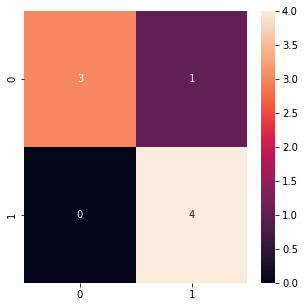

In [24]:
y_test = [0,0,0,1,1,0,1,1]
y_pred = [0,1,0,1,1,0,1,1]

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
# ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
sn.heatmap(conf_matrix, annot=True)

# Accuracy


Accuracy is also used as a statistical measure of how well a binary classification test correctly identifies or excludes a condition. That is, the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. As such, it compares estimates of pre- and post-test probability. To make the context clear by the semantics, it is often referred to as the "Rand accuracy" or "Rand index". It is a parameter of the test. 

$$
\textrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Sources:
[Metz1978](https://www.sciencedirect.com/science/article/abs/pii/S0001299878800142?via%3Dihub)
and 
[Wiki: Accuracy and Precision](https://en.wikipedia.org/wiki/Accuracy_and_precision)

$$
\textrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

![accuracy](Accuracy.png)



## Example - Accuracy

Try to implement...

First get the Ground Truth:

In [25]:
df = pd.read_csv("https://github.com/mjirik/ZDO/raw/master/objekty/binar_classification/annotation.csv")
df[2:5]

,filename,contain_object
2,02.jpg,0
3,03.jpg,1
4,04.jpg,1


In [26]:
np.array(df["contain_object"])

array([0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

## Precision, Recall=Sensitivity, Specificity

![precision_recall](Precisionrecall_horizontal.png)






Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

Recall, Sensitivity or True Positive Rate (TPR), is the proportion of people that tested positive and are positive (True Positive, TP) of all the people that actually are positive (Condition Positive, CP = TP + FN). It can be seen as the probability that the test is positive given that the patient is sick. With higher sensitivity, fewer actual cases of disease go undetected (or, in the case of the factory quality control, fewer faulty products go to the market).

Specificity (SPC) or True Negative Rate (TNR) is the proportion of people that tested negative and are negative (True Negative, TN) of all the people that actually are negative (Condition Negative, CN = TN + FP). As with sensitivity, it can be looked at as the probability that the test result is negative given that the patient is not sick. With higher specificity, fewer healthy people are labeled as sick (or, in the factory case, fewer good products are discarded). 

[Source](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics)




# Česká terminologie

České překlady pojmů se v praxi příliš nepoužívají. Nejblíže asi terminologie pro měření kvality přístrojové techniky ČSN ISO 5725-2.

**Přesnost** (anglicky accuracy, francouzsky exactitude, německy Genauigkeit) je souhrnný pojem charakterizující míru odchylek měření nebo pokusů od referenční hodnoty (tj. hodnoty, která je pokládána obecným jazykem za „správnou“). Přesnost zahrnuje pravdivost a preciznost (dříve správnost a shodnost).

**Pravdivost** (anglicky trueness, francouzsky justesse, německy Richtigkeit, podle starší verze ČSN ISO 5725-2:1997 správnost) znamená, že průměr velkého počtu měření nebo zkoušek se blíží skutečné hodnotě měřené veličiny (pravou nebo přijatou referenční hodnotou); jedná se o systematickou chybu, o míru statistického zkreslení.

**Preciznost** (anglicky precision, francouzsky fidélité, německy Präzision, podle ČSN starší verze ISO 5725-2:1997 též shodnost) se týká těsnosti shody mezi výsledky měření; jedná se o míru rozptylu.

Zdroje:

[ČSN ISO 5725-2: Přesnost (pravdivost a preciznost) metod a výsledků měření](https://eshop.normservis.cz/nahledy/view/csn/01/505452/505452_nahled.pdf)

[Wiki: Přesnost a preciznost](https://cs.wikipedia.org/wiki/P%C5%99esnost_a_preciznost)

## F1 Score


$$F1 Score = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$




## Metrics Implementation

[Scikit-learn metrics docs](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [47]:
y_true = [0,0,0,1,1,0,1,1]
y_pred = [0,1,0,1,1,0,1,1]

print(f"Accuracy ={sklearn.metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision={sklearn.metrics.precision_score(y_true, y_pred)}")
print(f"Recall   ={sklearn.metrics.recall_score(y_true, y_pred)}")
print(f"F1       ={sklearn.metrics.f1_score(y_true, y_pred)}")

Accuracy =0.875
Precision=0.8
Recall   =1.0
F1       =0.888888888888889


# ROC curve

ROC křivka (z anglického Receiver Operating Characteristic, operační charakteristika přijímače) je graf, který popisuje kvalitu binárního klasifikátoru v závislosti na nastavení jeho klasifikačního prahu.

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png width="300"/>

Source: [scikit-learn docs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)

<!-- ![ROC](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png) -->

Čím tedy je ROC křivka zakřivenější ve směru vzhůru, tím víc klasifikační proměnná obsahuje informace o zařazení objektů a tím je její použití pro danou klasifikační úlohu vhodnější. Jako souhrnné hodnocení klasifikační schopnosti proměnné se proto často používá plocha pod ROC křivkou.



Binárním klasifikátorem se rozumí zařízení (nebo člověk) odhadující zařazení nějakých objektů nebo případů do dvou skupin, obecně označovaných jako pozitivní a negativní. Přitom se předpokládá, že objekty jsou charakterizovány nějakou vlastností (proměnnou) vyjádřenou číslem a že klasifikátor zařazuje do pozitivní skupiny právě ty, u kterých hodnota této proměnné přesáhne stanovený klasifikační práh (což je nějaké pevně dané číslo). Příkladem binárního klasifikátoru může být bankéř, který na základě kreditního skóre nějaké osoby rozhoduje, zda jí lze (pozitivní) nebo nelze (negativní) úspěšně poskytnout úvěr. Klasifikátor na základě takového postupu může buď objekt zařadit správně, anebo se může dopustit chyby; navíc záleží i na tom, zda případ je, nebo není ve skutečnosti pozitivní. Lze tak rozlišit čtyři případy: 1. skutečný pozitivní (true positive, jejich počet se označuje TP; odpovídá situaci, kdy bankéř poskytne úvěr a klient ho řádně splatí), 2. skutečný negativní (true negative, TN; bankéř odmítne klienta, který by úvěr nesplatil), 3. falešný pozitivní čili falešný poplach (false positive, FP; poskytnutí úvěru klientovi, který peníze bance nevrátí) a 4. falešný negativní (false negative, FN; klient nedostane úvěr, i když by ho řádně splácel).


[Wikipedia: ROC křivka](https://cs.wikipedia.org/wiki/ROC_k%C5%99ivka)


## References

[Wikipedia: ROC křivka](https://cs.wikipedia.org/wiki/ROC_k%C5%99ivka)

[Wikiskripta: ROC křivka](https://www.wikiskripta.eu/w/ROC_k%C5%99ivka)

[Fawcett, Tom (2006). "An Introduction to ROC Analysis" (PDF). Pattern Recognition Letters. 27 (8): 861–874. doi:10.1016/j.patrec.2005.10.010.](http://people.inf.elte.hu/kiss/11dwhdm/roc.pdf)

## Evaluation of multi-class classification

<AxesSubplot:>

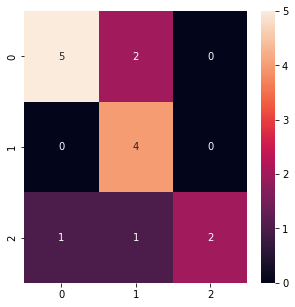

In [5]:
y_true = [0,0,0,1,1,0,2,0,0,0,1,1,2,2,2]
y_pred = [0,1,0,1,1,0,1,0,1,0,1,1,2,0,2]

conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True)


In [6]:
y_true = [0,0,0,1,1,0,2,0,0,0,1,1,2,2,2]
y_pred = [0,1,0,1,1,0,1,0,1,0,1,1,2,0,2]

print(f"Accuracy ={sklearn.metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision={sklearn.metrics.precision_score(y_true, y_pred, average=None)}")
print(f"Recall   ={sklearn.metrics.recall_score(y_true, y_pred, average=None)}")
print(f"F1       ={sklearn.metrics.f1_score(y_true, y_pred, average=None)}")

Accuracy =0.7333333333333333
Precision=[0.83333333 0.57142857 1.        ]
Recall   =[0.71428571 1.         0.5       ]
F1       =[0.76923077 0.72727273 0.66666667]


## References
* [Revisiting 3D ResNet for Video Recognition](https://paperswithcode.com/paper/revisiting-3d-resnets-for-video-recognition)


# Classification 


Input:
* Image

Output:

* Single-label Classification - One label per image selected from predefined group
* Multi-label Classification - Multiple labels selected from predefined group 


Evaluation:

* Accuracy
* Precision
* Recall (Sensitivity)
* F1
* ROC

# Regression

Regression is a process of finding the correlations between dependent and independent variables. It helps in predicting the continuous variables such as prediction of Market Trends, prediction of House prices, etc.

The task of the Regression algorithm is to find the mapping function to map the input variable(x) to the continuous output variable(y).

[Source](https://www.javatpoint.com/regression-vs-classification-in-machine-learning)

![regression_winter](regression_winter.png)

Regrese je proces hledání korelací mezi závislými a nezávislými proměnnými. Pomáhá při předpovídání spojitých proměnných, jako je predikce tržních trendů, predikce cen domů atd.

Úkolem regresního algoritmu je najít mapovací funkci pro mapování vstupní proměnné (x) na spojitou výstupní proměnnou (y).


## Regression vs Classification

![regression vs classification](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png)

Hlavní rozdíl mezi regresními a klasifikačními algoritmy je ten, že regresní algoritmy se používají k predikci spojitých hodnot, jako je cena, plat, věk atd., a klasifikační algoritmy se používají k predikci/klasifikaci diskrétních hodnot, jako je muž nebo žena, pravda nebo nepravda, Spam or Not Spam atd.



Source: [https://www.javatpoint.com/](https://www.javatpoint.com/regression-vs-classification-in-machine-learning)

<table>
<tbody><tr>
<th>Regresní algoritmus</th>
<th>Algoritmus klasifikace</th>
</tr>
<tr>
<td>Při regresi musí nabývat výstupní proměnná spojitých hodnot.</td>
<td>Při klasifikaci musí být výstupní proměnná diskrétní hodnota.</td>
</tr>
<tr>
<td>Úkolem regresního algoritmu je mapovat vstupní hodnotu (x) na spojitou výstupní proměnnou (y).</td>
<td>Úkolem klasifikačního algoritmu je mapovat vstupní hodnotu (x) na diskrétní výstupní proměnnou (y).</td>
</tr>
<tr>
<td>Regresní algoritmy se používají se spojitými daty.</td>
<td>Klasifikační algoritmy se používají s diskrétními daty.</td>
</tr>
<tr>
<td>Při regresi se snažíme najít nejvhodnější linii, která dokáže přesněji předpovědět výstup.</td>
<td>Při klasifikaci se snažíme najít rozhodovací hranici, která může rozdělit datovou sadu do různých tříd.</td>
</tr>
<tr>
<td>Regresní algoritmy lze použít k řešení regresních problémů, jako je předpověď počasí, předpověď ceny domu atd.</td>
<td>Klasifikační algoritmy lze použít k řešení problémů klasifikace, jako je identifikace spamových e-mailů, rozpoznávání řeči, identifikace rakovinných buněk atd.</td>
</tr>
<tr>
<td>Regresní algoritmus lze dále rozdělit na lineární a nelineární regresi.</td>
<td>Algoritmy klasifikace lze rozdělit na binární klasifikátor a klasifikátor s více třídami.</td>
</tr>
</tbody></table>

Source: [https://www.javatpoint.com/](https://www.javatpoint.com/regression-vs-classification-in-machine-learning)



<table>
<tbody><tr>
<th>Regression Algorithm</th>
<th>Classification Algorithm</th>
</tr>
<tr>
<td>In Regression, the output variable must be of continuous nature or real value.</td>
<td>In Classification, the output variable must be a discrete value.</td>
</tr>
<tr>
<td>The task of the regression algorithm is to map the input value (x) with the continuous output variable(y).</td>
<td>The task of the classification algorithm is to map the input value(x) with the discrete output variable(y).</td>
</tr>
<tr>
<td>Regression Algorithms are used with continuous data.</td>
<td>Classification Algorithms are used with discrete data.</td>
</tr>
<tr>
<td>In Regression, we try to find the best fit line, which can predict the output more accurately.</td>
<td>In Classification, we try to find the decision boundary, which can divide the dataset into different classes.</td>
</tr>
<tr>
<td>Regression algorithms can be used to solve the regression problems such as Weather Prediction, House price prediction, etc.</td>
<td>Classification Algorithms can be used to solve classification problems such as Identification of spam emails, Speech Recognition, Identification of cancer cells, etc.</td>
</tr>
<tr>
<td>The regression Algorithm can be further divided into Linear and Non-linear Regression.</td>
<td>The Classification algorithms can be divided into Binary Classifier and Multi-class Classifier.</td>
</tr>
</tbody></table>

Source: [https://www.javatpoint.com/](https://www.javatpoint.com/regression-vs-classification-in-machine-learning)

## Regression evaluation

### Mean Square Error
$$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$

### Mean Absolute Error


$$
\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.
$$


### Mean Absolute Error

$$
\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)
$$


In [56]:
y_true = [2,3,1,1,3,1,5]
y_pred = [2,3,2,1,2,2,2]

print(f"MSE ={sklearn.metrics.mean_squared_error(y_true, y_pred)}")
print(f"MAE ={sklearn.metrics.mean_absolute_error(y_true, y_pred)}")
print(f"MaxE={sklearn.metrics.max_error(y_true, y_pred)}")

MSE =1.7142857142857142
MAE =0.8571428571428571
MaxE=3


## What if...

### Is it possible to estimate temperature with classification?


# Regression - conclusion

Input:
  * Image
  
Output:
  * Continuous (float) number or vector
  
  
Metrics:
  * Mean Square Error
  * Mean Absolute Error
  * Max Error



# Filtration

In signal processing, a filter is a device or process that removes some unwanted components or features from a signal. 

Filtering is a class of signal processing, the defining feature of filters being the complete or partial suppression of some aspect of the signal. Most often, this means removing some frequencies or frequency bands. However, filters do not exclusively act in the frequency domain; especially in the field of image processing many other targets for filtering exist.

Nejčastější použití je redukce šumu.

![filtration](https://www.researchgate.net/profile/David-Zhang-65/publication/271427056/figure/fig5/AS:655180534136833@1533218620169/Noise-reduction-achieved-by-low-SNR-MASI-processing-The-raw-image-with-low-SNR-is-shown.png)

Noise reduction

[T. Vogelsong, J. Tower, T. Senko, P. Levine, J. Janesick, J. Zhu, D. Zhang, G. van der Wal, and M. Piacentino "Low-light NV-CMOS image sensors for day/night imaging", Proc. SPIE 8713, Airborne Intelligence, Surveillance, Reconnaissance (ISR) Systems and Applications X, 87130F (31 May 2013); https://doi.org/10.1117/12.2016396](http://dx.doi.org/10.1117/12.2016396)

## Target dependent

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Oxford_Street_December_2006.jpeg/1920px-Oxford_Street_December_2006.jpeg" width="500"/>
</div>

What is my goal?
* People counting?
* Building shape recontruction
* Car tracking?

## Filtration - Conclusion

Input:
* Image

Output:
* Image with supressed unwanted components of the image and emhasized target components of the image

# Localization

Single object localization

![single-object-localization](https://miro.medium.com/max/608/1*uI4AaqoDew9p9YRsVFDZNg.png)

Image source: [Object Localization using Keras by Roy Ganz](https://medium.com/analytics-vidhya/object-localization-using-keras-d78d6810d0be)



Input:
* Image

Output:
* Bounding box of single object

# Detection

<!-- ![detection]() -->
<div>
<img src="https://cogneethi.com/assets/images/evodn/intro.jpg" width="600"/>
</div>

Image source: [Evolution of object detection networks](https://cogneethi.com/evodn/object_detection_intro/)

## Detection - Evaluation

![Intersection over Union](https://upload.wikimedia.org/wikipedia/commons/2/2d/Intersection_over_Union_-_object_detection_bounding_boxes.jpg)





### Intersection over Union (Jaccard index)

$$
J(A,B) = {{|A \cap B|}\over{|A \cup B|}} = {{|A \cap B|}\over{|A| + |B| - |A \cap B|}}
$$

<!-- ![IoU equation](https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png) -->
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png" width="400"/>

### Dice coefficient

$$
DICE = \frac{2\left|{S_{g}^{1}} \cap {S_{t}^{1}}\right|}{\left|{S_{g}^{1}}\right| + \left|{S_{t}^{1}}\right|} = \frac{2 TP}{2 TP + FP + FN}
$$

IoU (Jaccard index) is always larger than DICE except at the extrema {0,1} where they are equal. Furthermore the two metrics are related according to

$$
IoU=\frac{\left|{S_{g}^{1}} \cap {S_{t}^{1}}\right|}{\left|{S_{g}^{1}} \cup {S_{t}^{1}}\right|}=\frac{2\left|{S_{g}^{1}} \cap {S_{t}^{1}}\right|}{2\left(\left|{S_{g}^{1}}\right|+\left|{S_{t}^{1}}\right|- \left|{S_{g}^{1}} \cap {S_{t}^{1}}\right|\right)} =\frac{DICE}{2-DICE}
$$


### References

* [ Jaccard, Paul (February 1912). "THE DISTRIBUTION OF THE FLORA IN THE ALPINE ZONE.1". New Phytologist. 11 (2): 37–50. doi:10.1111/j.1469-8137.1912.tb05611.x. ISSN 0028-646X.](https://doi.org/10.1111%2Fj.1469-8137.1912.tb05611.x)
* [Wikipedia: Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
* [sklearn doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score)
* [Dice LR. Measures of the amount of ecologic association between species. Ecology. 1945; 26(3):297–302.](https://doi.org/10.2307%2F1932409)
* [Taha, A.A., Hanbury, A. Metrics for evaluating 3D medical image segmentation: analysis, selection, and tool. BMC Med Imaging 15, 29 (2015). https://doi.org/10.1186/s12880-015-0068-x](https://doi.org/10.1186/s12880-015-0068-x)

## Detection - Conclusion

Input:
* Image




Output:
* Bounding box and class label for each object

Metrics:
* Intersection over Union (Jaccard index)
* Dice coefficient

# Segmentation

VSTUP: 
* INTENZITNÍ OBRAZ

VÝSTUP: 
* OBRAZ ROZČLENĚNÝ NA ČÁSTI, KTERÉ MAJÍ SOUVISLOST S OBJEKTY REÁLNÉHO SVÉTA

Kompletní segmentace
* vytvořené oblasti jednoznačně korespondují s objekty ve vstupním obraze
* obecně nezbytná spolupráce s vyšší úrovní zpracování, využití znalostí o řešeném problému
* v případě, kdy je obraz tvořen kontrastními objekty na pozadí konstantního jasu – dobré výsledky
kompletní segmentace i na nižší úrovni zpracování
* Příklad: text, krevní buňky, počítání šroubků
Částečná segmentace
* vytvořené oblasti jsou homogenní vzhledem k určitým zvoleným vlastnostem (jas, barva, textura,
apod.)
* oblasti se obecně mohou překrývat
* je třeba aplikovat další postupy na vyšší úrovni zpracování
* Příklad: scéna s polem a lesem při pohledu z okna – po segmentaci neodpovídá objektu jedna oblast
Pro segmentaci se využívá znalost o řešeném problému
čím více, tím lépe

In [15]:
from IPython.display import YouTubeVideo
from datetime import timedelta

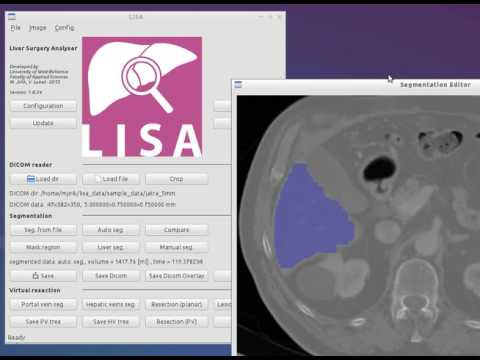

In [16]:
YouTubeVideo(id="_bp5LTQ9D0M", start=int(timedelta(hours=0, minutes=0, seconds=33).total_seconds()))

[YouTube link](https://youtu.be/_bp5LTQ9D0M?t=33)

## Semantic Segmentation

<img src="https://www.researchgate.net/publication/326875064/figure/fig3/AS:659518916681730@1534252971987/Example-of-2D-semantic-segmentation-Top-input-image-Bottom-prediction.png" width="700" />


Source: [Jeong, J.; Yoon, T.S.; Park, J.B. Towards a Meaningful 3D Map Using a 3D Lidar and a Camera. Sensors 2018, 18, 2571.](https://doi.org/10.3390/s18082571)


<img src="https://www.jeremyjordan.me/content/images/2018/05/deeplabcityscape.gif" width="700"/>

Source: [An overview of semantic image segmentation by Jeremy Jordan](https://www.jeremyjordan.me/semantic-segmentation/) and [YouTube](https://www.youtube.com/watch?v=ATlcEDSPWXY)

### Semantic segmentation: U-Net


<img src="https://camo.githubusercontent.com/d55a437337d0e08c6a082714959253d80b81ce4e6c18e94688d9aff16e3bf2f8/68747470733a2f2f6c6d622e696e666f726d6174696b2e756e692d66726569627572672e64652f70656f706c652f726f6e6e656265722f752d6e65742f752d6e65742d6172636869746563747572652e706e67" width="700"/>


[Ronneberger, O., P.Fischer, & Brox, T. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), 9351, 234–241. http://lmb.informatik.uni-freiburg.de/Publications/2015/RFB15a](https://doi.org/10.1007/978-3-319-24574-4_28)


## Instance Segmentation

<img style="height:500px" src="https://www.researchgate.net/profile/Samuel-Van-Ackere/publication/337673123/figure/fig43/AS:831567765188614@1575272613523/4-Difference-between-classification-and-localisation-object-detection-semantic.jpg" />

## Instance Segmentation

Input:
* Image

Output:
* Per pixel segmenation of each individual object of each class

## Segmentation - evaluation

Per pixel (voxel)
* Intesection over Union (Jaccard index)
  $$
  IoU = \frac{\left|{A} \cap {B}\right|}{\left|{A} \cup {B}\right|}
  $$



* Dice coefficient
  $$
  DICE = \frac{2\left|{A} \cap {B}\right|}{\left|{A}\right| + \left|{B}\right|} = \frac{2 TP}{2 TP + FP + FN}
  $$
  

* Pixel Accuracy
  $$
  \textrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$
  Pixel Accuracy can sometimes provide misleading results when the class representation is small within the image, as the measure will be biased in mainly reporting how well you identify negative case (ie. where the class is not present).

![sliver_metodics](sliver_metodics_all.png)

* Hausdorf distance 
  $$
  d(\mathcal{S}_1, \mathcal{S}_2) = max_{p \in \mathcal{S}_1}(d(p, \mathcal{S}_2)) \label{eq:05}
  $$
* Max distance
  $$
  \text{MaxD} = max(d(\mathcal{S}_1, \mathcal{S}_2), d(\mathcal{S}_2, \mathcal{S}_1)) \label{eq:04}
  $$
* Average Symmetric Surface Distance
  $$
  \text{ASD}=\frac1{{\left|\text{S}{\left(\text{GT}\right)}\right|}+{\left|{\left.\text{S}\left(\text{MS}\right.\right)}\right|}}{\left(\sum_{\left.{\text{S}}_\text{gt}\in\text{S}\left(\text{GT}\right.\right)}\text{d}{\left({\text{S}}_\text{gt},\text{S}{\left(\text{MS}\right)}\right)}+\sum_{\left.{\text{S}}_\text{ms}\in\text{S}\left(\text{MS}\right.\right)}\text{d}{\left({\text{S}}_\text{ms},\text{S}{\left(\text{GT}\right)}\right)}\right)}
  $$
  Average of all the distances from points on the boundary of MS to the boundary of the GT, and vice versa


<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5817231/bin/JMI-005-015006-g001.jpg">

### References

* [Yeghiazaryan and Voiculescu: Family of boundary overlap metrics for the evaluation of medical image segmentation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5817231/)
* [Jeremy Jordan: Evaluating image segmentation models](https://www.jeremyjordan.me/evaluating-image-segmentation-models/)

## Segmentation - Conclusion

Input:
* Image

Output:
* Labeled Image

Metrics:
* Intersection over Union
* Jaccard index
* Pixel Accuracy (problematic)
* Hausdorf distance / Max distance
* Average Symmetric Surface Distance

# Tracking

Input: 
* Video

Output:
* Tracks defined by coordinates of single point or bounding box in time.

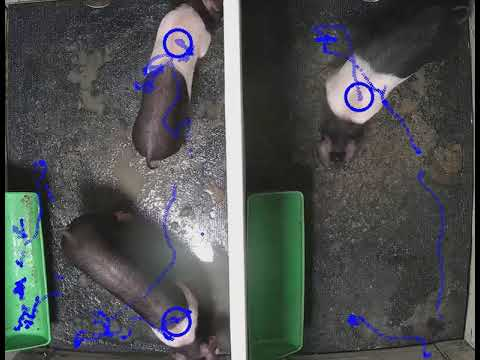

In [7]:
YouTubeVideo(id="re5VNG4PJ3M")

## Tracking - Evaluation

![track errors](https://www.ncbi.nlm.nih.gov/pmc/articles/instance/8839404/bin/sensors-22-00793-g002.jpg)

## Tracking - Evaluation

Point tracking
* Mean Square Error
* Hausdorff distance (MaxD)


Bounding box tracking:
* Multiple Object Tracking Accuracy (MOTA)
$$
MOTA = 1 - \frac{\sum_t{FN_t + FP_t + IDSt}}{\sum_t{GT_t}}
$$
where $FN_t$ is the number of false negatives (missed targets), $FP_t$ the number of false positives (ghost trajectories), $IDS_t$ the number of identity switches at time t. A target is considered missed if the IoU with the ground truth is inferior to a given threshold. (Note that the MOTA can be negative.)

## References
* [Song et al.: Performance Evaluation Metrics and Approaches for Target Tracking: A Survey](https://doi.org/10.3390/s22030793)
* [Cindy Tring Sridykhan: A tour of Video Object Tracking — Part III: Multiple Object Tracking](https://medium.com/@cindy.trinh.sridykhan/a-tour-of-video-object-tracking-part-iii-multiple-object-tracking-5e3a15ae0a7c)

# Style Transfer

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Neural-Style-Transfer-from-Famous-Artworks-to-a-Photograph.png" width="400"/>


![colorization](https://machinelearningmastery.com/wp-content/uploads/2018/12/Examples-of-Photo-Colorization.png)

![zebra](https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Styling-Zebras-and-Horses.png)

Taken from "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks"

![domain adaptation](https://miro.medium.com/max/738/1*b6YegiCxQYGTf3HPwzCPzQ.png)

Taken from "10 Interesting Computer Vision Tasks"

Může se jednat i o změnu z léta do zimy, nebo z fotografie na kresbu

## References
* [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)
* [Application of Deep Learning for Computer Vision](https://machinelearningmastery.com/applications-of-deep-learning-for-computer-vision/)
* [Colorful Image Colorization](https://arxiv.org/abs/1603.08511)
* [Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/abs/1703.10593)
* [10 Interesting Computer Vision Tasks](https://towardsdev.com/10-interesting-computer-vision-tasks-3e5437a14668)

# Style Transfer

Input:
* Image

Output: 
* Image transfered in different style

# Image Reconstruction 
Image reconstruction and image inpainting is the task of filling in missing or corrupt parts of an image.

![image restauration](https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Photo-Inpainting.png)

Taken from "Image Inpainting for Irregular Holes Using Partial Convolutions"

## References
* [Image Inpainting for Irregular Holes Using Partial Convolutions](https://arxiv.org/abs/1804.07723)

# Image Super Resolution

![super resolution](https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-the-results-from-Different-Super-Resolution-Techniques.png)

Taken from "Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network"


## References
* [Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network](https://arxiv.org/abs/1609.04802)

# Image Synthesis

![image synthesis](https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Generated-Bathrooms.png)

Example of Generated Bathrooms.
Taken from "Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks"

## References
 * [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks](https://arxiv.org/abs/1511.06434)

# Pose estimation

![pose estimation sports](https://miro.medium.com/max/1400/1*BYB1vH9_18onpci0RfVnWA.png)

Taken from "Deep Sports Pose"

![lynx](lynx_lynx.jpeg)

<img src="https://lh3.googleusercontent.com/juF-2r6lR2HJygYebXlzXHWs5R7LmPtstjOnA9L2xNSbszVvRDf_ppC2vlQuQ1St2hiOC3gJfIy5KWm_ivOEL1tGm_ZfTyjLBzuYEZHSiq1fQz7_OH3f4bbo21YxvyjVP30ktwvYvbAa_xAYZ5iQOcshbSJ6rLLDT8cO7lJM8tcbgoD2ARKK9QJCAn4zZVHUVGHT6nvbMTEbDMDCUzsnYQuSZMFwx-DUwuOu78m8AogIR5M6hVoVI0TRj_nrPVYUqFPWE4QKr8UKDdrsz4OMVDqy-xhv-jCoXDu9CngaRam-fxHekzQ-qejV8IAmD24B_H9frKsAgH_GAUhyoYo-_HlpLcU-afaJnbH48hsj73P1y9dtPK51tzA0qok5JbS-_aACA2sGIqbGxATxMd2L9-POqT2EcD8NELyS1V9kQkQrDtYl1aNvh8jpj2T945thfJ6tRNNJh6J7sSeZsulPY-7uEZG73FA2m-DCumh7YB1hHsOGGdIr8XPWCtbWvU9lyh3c-dMScGlhkOXhTGUf8qF-sZl4NyqOOKOHHM3RV6fnRp_6GYeij3MzTqHzpU7gZ9q4isweOl7g5c6RV3FqtbgWTl7PcnvoG8WfJT-wzT5ApkcGMcRhA0ourFjdpp6HDhM9i4cyRaAGCigm91LkoB764RBz-QBP9uaQDAnu69hnxypSpXAtY6J-TBvYRAFkxxNM6CMnKct7rk8rE4MQiRBc=w1214-h910-no?authuser=0"/>

<img src="https://lh3.googleusercontent.com/0Yg9VYn-vN7DkVKNQRJlOBui6-UXkwX-aiVFZJmXtTKsWplIqBqdd-cQ8Lnp2tdTjM9qSh1YlaN6SW1FWZk15UlKt4nkifajNF3u42DbVC5eK0vYRHSfrdqwuFWOuP8AUTpEM2fuxbzpHTj1Uodr33T5VJVhJYD-QVmW-Z02USNeZisjJJW7DATiDECgfMQos6Mkn0zyeRQ93HVZLniuCqJ-RmnIRTsuBbsVJpacwUIVgJYS4JX3o29xJz9x5P0KYMafER5Km3H5JkbAndPhVFuanIMHZEX5w5xdcrcRuIKaHEPS0dTuAT_vpLo4RaG6UfbP1qFOqCcg_7i0L0AgbZeIDGCBuIcpa0uWVLx5l2JZDFs2npCVTOi-rAa7Helyoew0KyyGmap4D7wppL1q-0Mio5Do7-kaEpDu24O1fmX841ojxKdIJ7g6kad1tlD5dFuRf0ukvk3a7vuw9t7s7z5RlomAX0KuoAI-5Uzr6Igw-qkWrErRi3EOTdddbA9UJigP546AwHaYqx_6w_7nvhxz-jcyr8y62vrWU97kt50hCmsxJkBjEhSPIJIea3n6Fx80B1H3W5U2OyH36j9_0_9xFKHAYri23GTu5Ob-E-JXD8Pa5TDPPn8Ucn16dcx2LtDReGUBJ2qsPoeCj7fYwA9PJFti9QHVOtr2wz-07wBjvPbyToTujj7iT7NJXk9vtLdiMdDiMlEqMjv-kiciyZV9=w1542-h868-no?authuser=0"/>

<img src="https://lh3.googleusercontent.com/eD5km0q3ZhXg9ICqsYYfvrVPbghCrkP7LMLBsmnsJeWtnkOrKpcdqEY-ORHx7wQDqvio53WIMzYE533PQR_-GTxNm5uK3dnq0e_gxGsmzil7V6-nUMwxCqeC4S2Pwes95LAVcI69WKCZXY8G2YtoMfHzWg-ug1YTH021s0lFGro0KcHxnq9Mot5gTJtNLJHljiLL9eynrRbonUkv5I1UxydgxJNKyJSpO2Dds6VEgPhiM9RQBKccHCXB55NHbeHSBi7LFgzv8eWiPPCIWlSZQMhpt9U4i9HtYY7AS40s61XwntmZS8XAvwbvb_oDv6tssnqCI9xFqQjRECimUiqH7tTtokxa--vSsnN-dUxFgiYP6x2i4PlE2qMhZkYGSrWai0UCWMR8xnK2qsYqefvKC7v59o2VUmfVZtMBvuBAN5Aojg3ppD4ipJFhsGlFvXdiDCo5WvBHeezts1uVilG8J_edBQO28w2cv5S1Xdrm5HB-Z-O3HEc7M6oa5l0c_eQZqYcuByfauZeRuivcudQ4NaVCpbvqLiEOt8nT6hKDINFLTkAm_LCE5uO5ljnachAave9VUhTsJ73h3k7YY-B-90bh7CSDkIszbT7mPLU7peCoJ3hXz62FoEfaP9yubVH57xE8uoCPNS2ngRsQz9O0rRMZL00rGRj2j-JUcDDgiXesJAnAp11X-LRMB0meXO7-5pGDClYo7AC56_k4ilNaPq3t=w1542-h868-no?authuser=0"/>

# References
* [Deep Sports Pose](https://www.uni-augsburg.de/en/fakultaet/fai/informatik/prof/mmc/research/research_projects/deep_sports_pose/)

# Most important tasks?

* Classification
* Filtration
* Localization
* Detection
* Tracking
* Style Transfer
* Recognition
* Identification
* Verification
* Segmentation
* Landmark detection
* Image restauration

In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Conclustion

<table><tr>
<th>Computer Vsision tasks</th>
<th> Experiment evaluation</th>
</tr>
<tr>
<td>
    
  * Classification
  * Filtration
  * Localization
  * Detection
  * Tracking
  * Style Transfer
  * Segmentation
  * Landmark detection
  * Image restauration

</td>
<td>
    
  * Mean Square Error
  * Accuracy
  * Precision
  * Sensitivity
  * Intersection over Union
    
</td>
</tr>
</table>